<a href="https://colab.research.google.com/github/zacharyb2002/Manh-Spring-22/blob/main/Copy_of_Copy_of_04_02_MNIST(openml).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Based Machine Learning Algorithm

[An introduction to machine learning with scikit-learn](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#introduction)

This notebook is inspired by Geron's [Hands-on Machine Learning with Scikit-Learn and TensorFlow](http://shop.oreilly.com/product/0636920052289.do) and [
Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition](http://shop.oreilly.com/product/0636920142874.do)

## Scikit-learn Definition:

**Supervised learning**, in which the data comes with additional attributes that we want to predict. This problem can be either:

* **Classification**: samples belong to two or more *classes* and we want to learn from already labeled data how to predict the class of unlabeled data. An example of classification problem would be the handwritten digit recognition example, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.


* **Regression**: if the desired output consists of one or more *continuous variables*, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

MNIST dataset - a set of 70,000 small images of digits handwritten. You can read more via [The MNIST Database](http://yann.lecun.com/exdb/mnist/)

***

## Downloading the MNIST dataset

In [ ]:
import numpy as np
import sklearn
sklearn.__version__

'0.21.3'

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784')
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [ ]:
len(mnist['data'])

70000

# Visualisation

In [ ]:
X, y = mnist['data'], mnist['target']

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape

(70000, 784)

In [ ]:
28 * 28

784

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
y = y.astype("float")

In [ ]:
X[69999]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   8., 117., 254., 220.,
        89.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        13.,  95., 212., 253., 253., 253., 157.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  16.,  95., 209., 253., 253., 253., 245.,
       125.,  18.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
y[69999]

6.0

In [ ]:
y.shape

(70000,)

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
def viz(n):
    plt.imshow(X[n].reshape(28,28))
    return

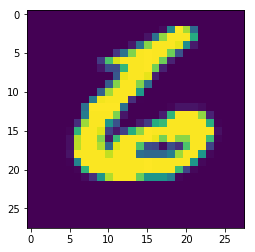

In [ ]:
viz(69999)

In [ ]:
y[1000]

0.0

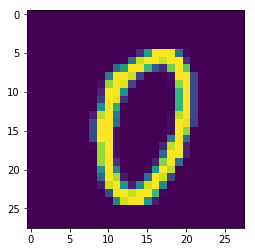

In [ ]:
viz(1000)

### Exercise: Locating the number 4 and plot the image

In [ ]:
type(y)

numpy.ndarray

In [ ]:
y == 4

array([False, False,  True, ...,  True, False, False])

In [ ]:
np.where(y==4)

(array([    2,     9,    20, ..., 69977, 69987, 69997]),)

In [ ]:
y[69977]

4.0

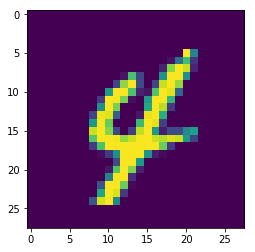

In [ ]:
_ = X[69977]
_image = _.reshape(28, 28)
plt.imshow(_image);

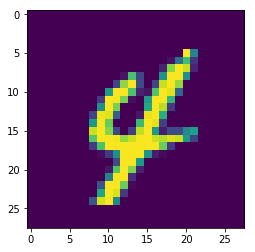

In [ ]:
viz(69977)

***

# Splitting the train and test sets

## Method #1

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

## Methond #2

In [ ]:
num_split = 60000

X_train, X_test, y_train, y_test = X[:num_split], X[num_split:], y[:num_split], y[num_split:]

**Tips**: Typically we shuffle the training set. This ensures the training set is randomised and your data distribution is consistent. However, shuffling is a bad idea for time series data.

# Shuffling the dataset

[Alternative Method](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)

In [ ]:
import numpy as np

In [ ]:
shuffle_index = np.random.permutation(num_split)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Training a Binary Classifier

To simplify our problem, we will make this an exercise of "zero" or "non-zero", making it a two-class problem.

We need to first convert our target to 0 or non zero.

In [ ]:
y_train_0 = (y_train == 0)

In [ ]:
y_train_0

array([False, False, False, ..., False, False, False])

In [ ]:
y_test_0 = (y_test == 0)

In [ ]:
y_test_0

array([False, False, False, ..., False, False, False])

At this point we can pick any classifier and train it. This is the iterative part of choosing and testing all the classifiers and tuning the hyper parameters

***

# SGDClassifier
[SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) Linear classifiers (SVM, logistic regression) with SGD training.

# Training

In [ ]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state = 0)
clf.fit(X_train, y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

# Prediction

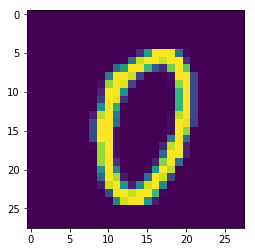

In [ ]:
viz(1000)

In [ ]:
clf.predict(X[1000].reshape(1, -1))

array([ True])

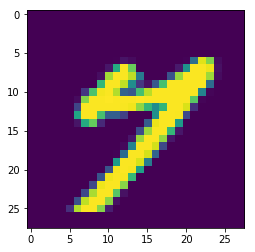

In [ ]:
viz(1001)

In [ ]:
clf.predict(X[1001].reshape(1, -1))

array([False])

***

# Performance Measures

# Measuring Accuracy Using Cross-Validation

## StratifiedKFold

Let's try with the `StratifiedKFold` stratified sampling to create multiple folds. At each iteration, the classifier was cloned and trained using the training folds and makes predictions on the test fold. 

StratifiedKFold utilised the Stratified sampling concept

* The population is divided into homogeneous subgroups called strata
* The right number of instances is sampled from each stratum 
* To guarantee that the test set is representative of the population

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
clf = SGDClassifier(random_state=0)

In [ ]:
skfolds = StratifiedKFold(n_splits=3, random_state=100)

In [ ]:
for train_index, test_index in skfolds.split(X_train, y_train_0):
    clone_clf = clone(clf)
    X_train_fold = X_train[train_index]
    y_train_folds = (y_train_0[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_0[test_index])
    
    clone_clf.fit(X_train_fold, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("{0:.4f}".format(n_correct / len(y_pred)))

0.9810
0.9857
0.9887


#### `cross_val_score` using K-fold Cross-Validation

K-fold cross-validation splits the training set into K-folds and then make predictions and evaluate them on each fold using a model trained on the remaning folds.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(clf, X_train, y_train_0, cv=3, scoring='accuracy')

array([0.98095095, 0.98565   , 0.98869943])

#### Exercise:

What if you would like to perform 10-fold CV test? How would you do that

In [ ]:
cross_val_score(clf, X_train, y_train_0, cv=10, scoring='accuracy')

array([0.98833528, 0.98766872, 0.98900183, 0.98616667, 0.98833333,
       0.98816667, 0.989     , 0.99133189, 0.99183197, 0.98766461])

***

## Danger of Blindly Applying Evaluator As a Performance Measure

Let's check against a dumb classifier

In [ ]:
1 - sum(y_train_0) / len(y_train_0)

0.9012833333333333

A simple check shows that 90.1% of the images are not zero. Any time you guess the image is not zero, you will be right 90.13% of the time. 

Bare this in mind when you are dealing with **skewed datasets**. Because of this, accuracy is generally not the preferred performance measure for classifiers.

# Confusion Matrix

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
y_train_pred = cross_val_predict(clf, X_train, y_train_0, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_train_0, y_train_pred)

array([[53494,   583],
       [  311,  5612]])

<img src='img//classification_confusion_matrix.jpg' width=50%>

In [ ]:
import pandas as pd
pd.DataFrame(confusion_matrix(y_train_0, y_train_pred))

,0,1
0,53494,583
1,311,5612


In [ ]:
pd.DataFrame(confusion_matrix(y_train_0, y_train_pred),
             columns=pd.MultiIndex.from_product([['Prediction'], ["Negative", "Positive"]]),
             index=pd.MultiIndex.from_product([["Actual"], ["Negative", "Positive"]]))

Prediction         
                  Negative Positive
Actual Negative      53494      583
       Positive        311     5612

# Precision

**Precision** measures the accuracy of positive predictions. Also called the `precision` of the classifier

$$\textrm{precision} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Positives}}$$

<img src='img//classification_precision.jpg' width=50%>

In [ ]:
from sklearn.metrics import precision_score, recall_score

Note the result here may vary from the video as the results from the confusion matrix are different each time you run it.

In [ ]:
precision_score(y_train_0, y_train_pred) # 5618 / (574 + 5618)

0.9058918482647296

In [ ]:
5618 / (574 + 5618)

0.9072997416020672

## Recall

`Precision` is typically used with `recall` (`Sensitivity` or `True Positive Rate`). The ratio of positive instances that are correctly detected by the classifier.

$$\textrm{recall} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Negatives}}$$

<img src='img//classification_recall.jpg' width=50%>

Note the result here may vary from the video as the results from the confusion matrix are different each time you run it.

In [ ]:
recall_score(y_train_0, y_train_pred) # 5618 / (305 + 5618)

0.9474928245821375

In [ ]:
5618 / (305 + 5618)

0.9485058247509708

## F1 Score

$F_1$ score is the harmonic mean of precision and recall. Regular mean gives equal weight to all values. Harmonic mean gives more weight to low values.


$$F_1=\frac{2}{\frac{1}{\textrm{precision}}+\frac{1}{\textrm{recall}}}=2\times \frac{\textrm{precision}\times \textrm{recall}}{\textrm{precision}+ \textrm{recall}}=\frac{TP}{TP+\frac{FN+FP}{2}}$$

The $F_1$ score favours classifiers that have similar precision and recall.


In [ ]:
from sklearn.metrics import f1_score

Note the result here may vary from the video as the results from the confusion matrix are different each time you run it.

In [ ]:
f1_score(y_train_0, y_train_pred)

0.9262254497441822

***

# Precision / Recall Tradeoff

Increasing precision reduced recall and vice versa

<img src='img//classification_precision-recall.png' width=50%>

Our classifier is designed to pick up zeros.

12 observations

***

**Central Arrow**

Suppose the decision threshold is positioned at the central arrow: 
* We get 4 true positives (We have 4 zeros to the right of the central arrow)
* 1 false positive which is actually seven.

At this threshold, the **precision accuracy** is $\frac{4}{5}=80\%$

However, out of the 6 zeros, the classifier only picked up 4. The **recall accuracy** is $\frac{4}{6}=67\%$

***

**Right Arrow**

* We get 3 true positives
* 0 false positive

At this threshold, the **precision accuracy** is $\frac{3}{3}=100\%$
However, out of the 6 zeros, the classifier only picked up 3. The **recall accuracy** is $\frac{3}{6}=50\%$

***

**Left Arrow**

* We get 6 true positives
* 2 false positive

At this threshold, the **precision accuracy** is $\frac{6}{8}=75\%$
Out of the 6 zeros, the classifier picked up all 6. The **recall accuracy** is $\frac{6}{6}=100\%$

***




In [ ]:
clf = SGDClassifier(random_state=0)
clf.fit(X_train, y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y[1000]

0.0

In [ ]:
y_scores = clf.decision_function(X[1000].reshape(1, -1))
y_scores

array([12975.04887282])

In [ ]:
threshold = 0

In [ ]:
y_some_digits_pred = (y_scores > threshold)

In [ ]:
y_some_digits_pred

array([ True])

In [ ]:
threshold = 40000
y_some_digits_pred = (y_scores > threshold)
y_some_digits_pred

array([False])

In [ ]:
y_scores = cross_val_predict(clf, X_train, y_train_0, cv=3, method='decision_function')

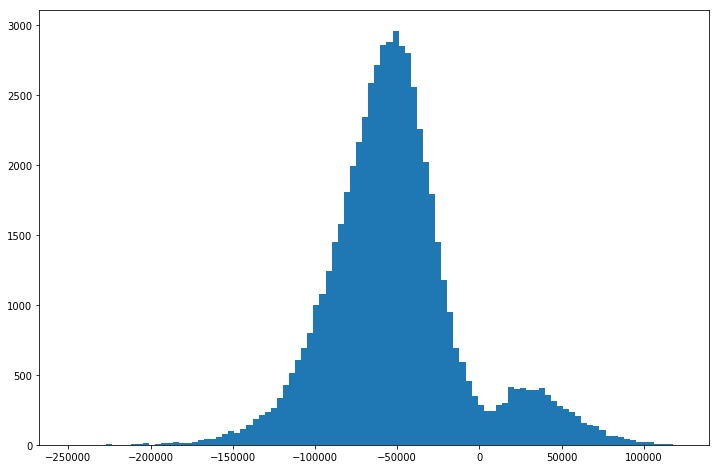

In [ ]:
plt.figure(figsize=(12,8)); plt.hist(y_scores, bins=100);

With the decision scores, we can compute precision and recall for all possible thresholds using the `precision_recall_curve()` function:

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([-0.5,1.5])    

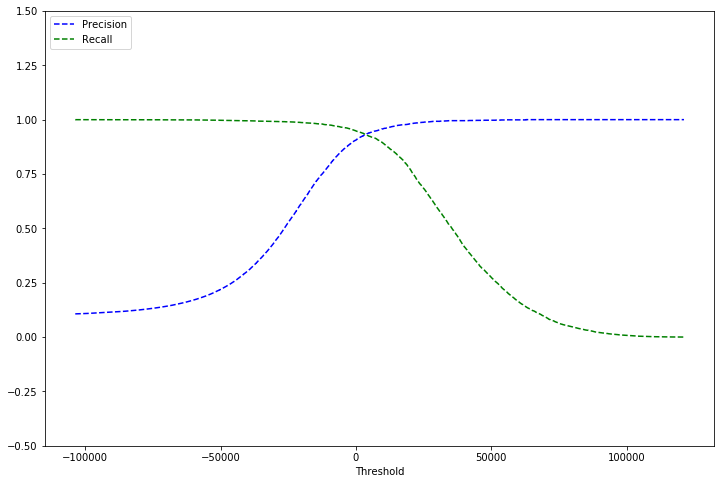

In [ ]:
plt.figure(figsize=(12,8)); 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

With this chart, you can select the threshold value that gives you the best precision/recall tradeoff for your task.

Some tasks may call for higher precision (accuracy of positive predictions). Like designing a classifier that picks up adult contents to protect kids. This will require the classifier to set a high bar to allow any contents to be consumed by children.

Some tasks may call for higher recall (ratio of positive instances that are correctly detected by the classifier). Such as detecting shoplifters/intruders on surveillance images - Anything that remotely resemble "positive" instances to be picked up.

***

One can also plot precisions against recalls to assist with the threshold selection

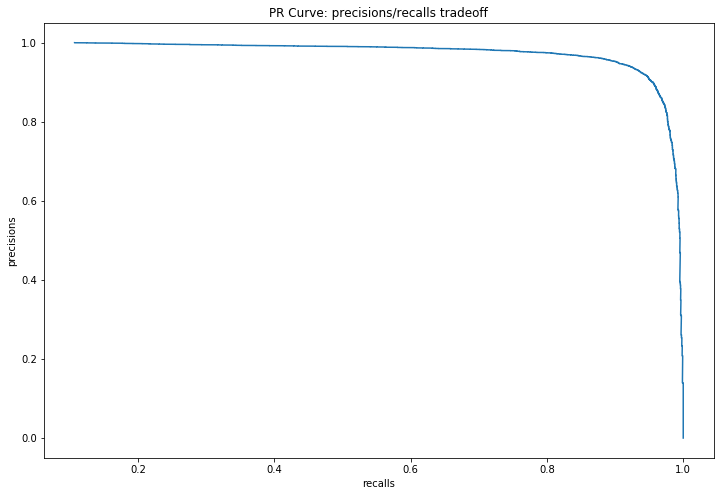

In [ ]:
plt.figure(figsize=(12,8)); 
plt.plot(precisions, recalls);
plt.xlabel('recalls');
plt.ylabel('precisions');
plt.title('PR Curve: precisions/recalls tradeoff');

# Setting High Precisions

Let's aim for 90% precisions.

In [ ]:
len(precisions)

55481

In [ ]:
len(thresholds)

55480

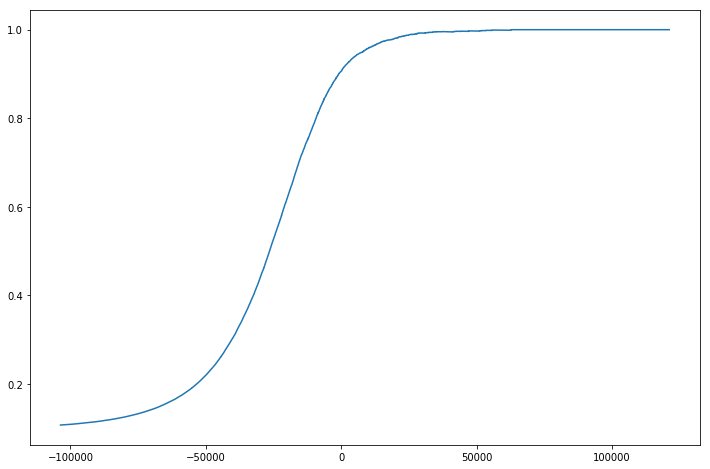

In [ ]:
plt.figure(figsize=(12,8)); 
plt.plot(thresholds, precisions[1:]);

In [ ]:
idx = len(precisions[precisions < 0.9])

In [ ]:
thresholds[idx]

-893.8414436589964

In [ ]:
y_train_pred_90 = (y_scores > 21454)

In [ ]:
precision_score(y_train_0, y_train_pred_90)

0.9837307778025407

In [ ]:
recall_score(y_train_0, y_train_pred_90)

0.7452304575384096

# Setting High Precisions

Let's aim for 99% precisions.

In [ ]:
idx = len(precisions[precisions < 0.99])

This is the same as the line above

In [ ]:
thresholds[idx]

27235.6816210263

In [ ]:
y_train_pred_90 = (y_scores > thresholds[idx])

In [ ]:
precision_score(y_train_0, y_train_pred_90)

0.9901579901579901

In [ ]:
recall_score(y_train_0, y_train_pred_90)

0.6454499409083235

#### Exercise

High Recall Score. Recall score > 0.9

In [ ]:
idx = len(recalls[recalls > 0.9])

In [ ]:
thresholds[idx]

9133.63528013417

In [ ]:
y_train_pred_90 = (y_scores > thresholds[idx])

In [ ]:
precision_score(y_train_0, y_train_pred_90)

0.9551891019896038

In [ ]:
recall_score(y_train_0, y_train_pred_90)

0.8997129832854972

***

## The Receiver Operating Characteristics (ROC) Curve

Instead of plotting precision versus recall, the ROC curve plots the `true positive rate` (another name for recall) against the `false positive rate`. The `false positive rate` (FPR) is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the `true negative rate`, which is the ratio of negative instances that are correctly classified as negative.

The TNR is also called `specificity`. Hence the ROC curve plots `sensitivity` (recall) versus `1 - specificity`.

<img src='img//classification_tnr_and_fpr.png' width=50%>

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

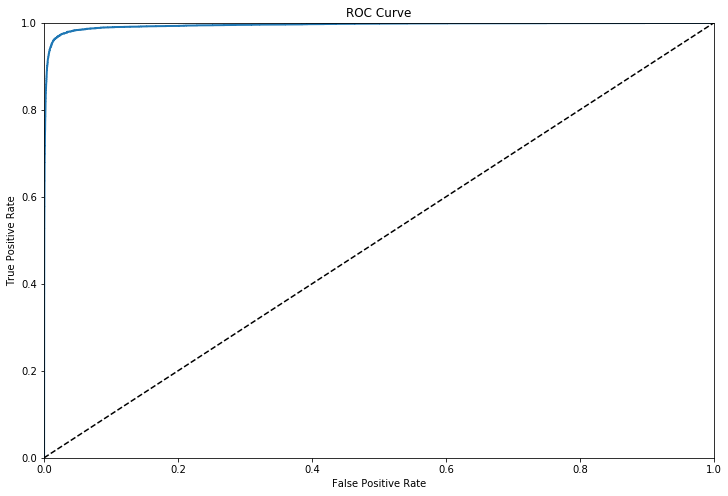

In [ ]:
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_train_0, y_scores)

0.9946167331117022

Use PR curve whenever the **positive class is rare** or when you care more about the false positives than the false negatives

Use ROC curve whenever the **negative class is rare** or when you care more about the false negatives than the false positives


In the example above, the ROC curve seemed to suggest that the classifier is good. However, when you look at the PR curve, you can see that there are room for improvement.

# Model Comparison

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
f_clf = RandomForestClassifier(random_state=0, n_estimators=100)

In [ ]:
y_probas_forest = cross_val_predict(f_clf, X_train, y_train_0,
                                    cv=3, method='predict_proba')

In [ ]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_0, y_scores_forest)

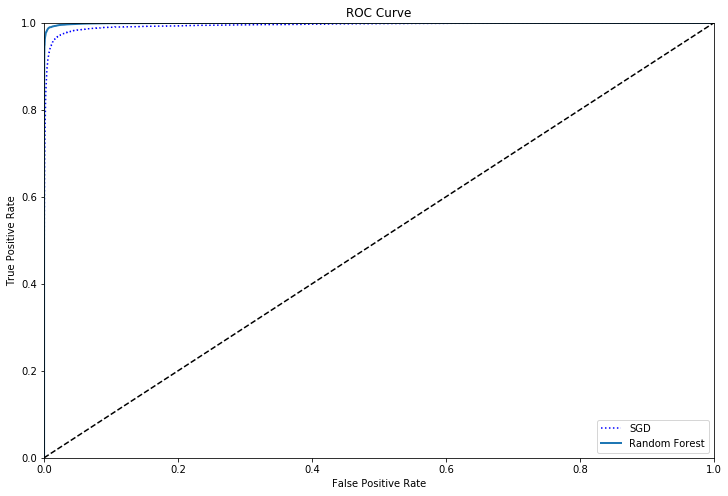

In [ ]:
plt.figure(figsize=(12,8)); 
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show();

In [ ]:
roc_auc_score(y_train_0, y_scores_forest)

0.9994739400100852

In [ ]:
f_clf.fit(X_train, y_train_0)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_train_rf = cross_val_predict(f_clf, X_train, y_train_0, cv=3)

In [ ]:
precision_score(y_train_0, y_train_rf) 

0.9948535936113576

In [ ]:
recall_score(y_train_0, y_train_rf) 

0.946479824413304

In [ ]:
confusion_matrix(y_train_0, y_train_rf)

array([[54048,    29],
       [  317,  5606]])

***